In [1]:
# List of Imports
import osmnx as ox
import geopandas as gpd

In [6]:
# Load data Polygons - Gargalo 1
polygons = gpd.read_file('./data/BGRI_2011/CONTINENTE/BGRI11_CONT.shp', dtype={'BGRI11': str})

# Add a column with all centroids
polygons = polygons.to_crs({'init': 'epsg:4326'})

In [7]:
abrantes = polygons[polygons['DTMN11']=='1401'].dissolve(by='DTMN11')

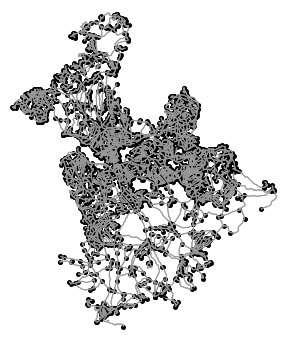

(<Figure size 471.065x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f919f728278>)

In [18]:
ox.plot_graph(ox.graph_from_place('Abrantes, Portugal'), node_color='000',node_edgecolor='000',file_format='png',save=True)

In [ ]:
# Get Network from Place Name
G = ox.graph_from_place('Aveiro, Portugal', network_type='all_private', which_result=2)
G_projected = ox.project_graph(G)

In [ ]:
ox.plot_graph(G_projected)
# ox.save_graph_shapefile(G_projected, filename='network-aveiro')

In [2]:
# Get Network from Geopandas 
portugal = gpd.read_file('./data/freguesias_portugal/OgrGeoJSON.shp')
# portugal.to_crs({'init': 'epsg:4326'})



In [3]:
portugal.head()

,Dicofre,Freguesia,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha,Des_Simpli,code_mun,NUTS3_2016,NUTS_nome,geometry
0,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.04,3436.91,Sagres,0815,150,Algarve,POLYGON ((-69674.53040000341 -294276.293900001...
1,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.17,3436.91,Sagres,0815,150,Algarve,POLYGON ((-69645.82100000429 -294240.694100001...
2,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.20,3436.91,Sagres,0815,150,Algarve,POLYGON ((-69720.37120000384 -294162.994500000...
3,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.09,3436.91,Sagres,0815,150,Algarve,POLYGON ((-70031.96070000362 -294143.877400001...
4,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.39,3436.91,Sagres,0815,150,Algarve,POLYGON ((-69800.00190000344 -294108.295600002...


In [4]:

latlng_geom, _ = ox.project_geometry(portugal.iloc[124].geometry, crs={'init':'epsg:3763'}, to_latlong=True)
# G = ox.graph_from_polygon(latlng_geom)

# portugal.head()

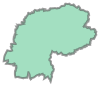

In [5]:
latlng_geom

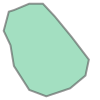

In [82]:
portugal.iloc[0].geometry

In [6]:
test = ox.graph_from_polygon(latlng_geom, network_type='drive')

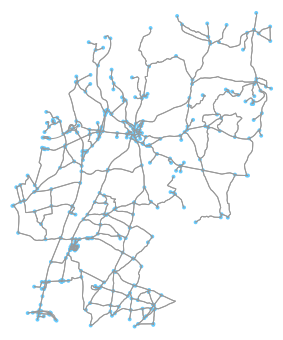

(<Figure size 446.81x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcf681aac18>)

In [7]:
ox.plot_graph(test)

In [48]:
ox.save_graph_shapefile(G_projected, filename='network-porto')

In [49]:
ox.save_graph_shapefile(G, filename='network-porto-raw')

In [ ]:
ox.save_graph_shapefile()